# 📝 Joining Data with Pandas — Left Join

## 1. Quick Review
- **Merging Tables in Pandas**  
  - We can combine data from two tables using `pd.merge()`.
  - By default, this is an **inner join**:  
    → Only rows with matching key values in both tables are included.

---

## 2. What is a Left Join?
- A **Left Join**:
  - Returns **all rows from the left table**.
  - Returns **matching rows from the right table** where keys match.
  - If no match is found → columns from the right table will have `NaN` (missing values).
- Visual analogy: Think of the **left table as the main guest list**, and the right table as a list of optional extra info — you keep *everyone from the left list*, even if they have no extra details in the right list.

---

## 3. Example Dataset: The Movie Database (TMDb)
We have **two tables**:

### Movies Table (`movies`)
Contains:
- `id` → unique movie ID
- `original_title`
- `popularity`
- `release_date`

```python
import pandas as pd

movies = pd.read_csv("tmdb_movies.csv")
print(movies.head())
print(movies.shape)
````

**Output:**

```
     id     original_title   popularity       release_date
0    257    Oliver Twist     20.415572        2005-09-23
1  14290  Better Luck ...    3.877036         2002-01-12
2  38365  Grown Ups         38.864027        2010-06-24
3   9672  Infamous           3.680896        2006-11-16
4  12819  Alpha and Omega   12.300789        2010-09-17
(4803, 4)
```

* We have **4,803 movies**.

---

### Taglines Table (`taglines`)

Contains:

* `id` → matches the `movies` table ID.
* `tagline` → a short promotional phrase for the movie.

```python
taglines = pd.read_csv("tmdb_taglines.csv")
print(taglines.head())
print(taglines.shape)
```

**Output:**

```
      id      tagline
0  19995   Enter the World of Pandora.
1    285   At the end of the world, the adventure begins.
2 206647   A Plan No One Escapes
3  49026   The Legend Ends
4  49529   Lost in our world, found in another.
(3955, 2)
```

* We have **3,955 taglines** — fewer than movies, meaning some movies have no tagline.

---

## 4. Performing a Left Join

We merge so that:

* All rows from `movies` are kept (left table).
* Only matching taglines are brought in from `taglines` (right table).

```python
movies_taglines = movies.merge(taglines, on="id", how="left")
print(movies_taglines.head())
```

**Output:**

```
     id     original_title   popularity       release_date      tagline
0    257    Oliver Twist     20.415572        2005-09-23        NaN
1  14290  Better Luck ...    3.877036         2002-01-12     Never undere...
2  38365  Grown Ups         38.864027        2010-06-24     Boys will be...
3   9672  Infamous           3.680896        2006-11-16     There's more...
4  12819  Alpha and Omega   12.300789        2010-09-17     A Pawsome 3D...
```

### Explanation:

* **`movies.merge(taglines, on="id", how="left")`**:

  * `movies` is the left table → keep all 4,803 rows.
  * Match rows from `taglines` where `id` is the same.
  * If no match → `tagline` becomes `NaN`.

---

## 5. Number of Rows Returned

```python
print(movies_taglines.shape)
```

**Output:**

```
(4805, 5)
```

* We now have **4,805 rows** — slightly more than `movies` because there might be duplicate IDs in `taglines` (e.g., multiple taglines for a single movie).

---

## 6. Key Takeaways (Memory Aid 💡)

* **Left Join = Keep ALL from Left + Match from Right**
* If `NaN` appears → no match found in the right table.
* Great when:

  * Left table = your main dataset.
  * Right table = additional details (optional).
* **Syntax Template**:

```python
result = left_table.merge(right_table, on="key_column", how="left")
```

---

📌 **Real-Life Analogy**:
Think of a **guest list** (left table) and an **RSVP card list** (right table).
You still keep all guests in your final list, even if some didn’t send back their RSVP card — their RSVP info will just be blank.

```



### Exercise
Counting missing rows with left join
The Movie Database is supported by volunteers going out into the world, collecting data, and entering it into the database. This includes financial data, such as movie budget and revenue. If you wanted to know which movies are still missing data, you could use a left join to identify them. Practice using a left join by merging the movies table and the financials table.

The movies and financials tables have been loaded for you.

Instructions 2/3
35 XP
2. Merge the movies table, as the left table, with the financials table using a left join, and save the result to movies_financials.
```python

# Merge movies and financials with a left join
movies_financials = movies.merge(financials, on='id', how='left')

Instructions 3/3
30 XP
3. Count the number of rows in movies_financials with a null value in the budget column.

# Merge the movies table with the financials table with a left join
movies_financials = movies.merge(financials, on='id', how='left')

# Count the number of rows in the budget column that are missing
number_of_missing_fin = movies_financials['budget'].isnull().sum()

# Print the number of movies missing financials
print(number_of_missing_fin)

# <script.py> output:
#     1574


### Exercise
Enriching a dataset
Setting how='left' with the .merge()method is a useful technique for enriching or enhancing a dataset with additional information from a different table. In this exercise, you will start off with a sample of movie data from the movie series Toy Story. Your goal is to enrich this data by adding the marketing tag line for each movie. You will compare the results of a left join versus an inner join.

The toy_story DataFrame contains the Toy Story movies. The toy_story and taglines DataFrames have been loaded for you.
```python
Instructions 1/2
50 XP
1. Merge toy_story and taglines on the id column with a left join, and save the result as toystory_tag.

# Merge the toy_story and taglines tables with a left join
toystory_tag = toy_story.merge(taglines, on = 'id', how='left')

# Print the rows and shape of toystory_tag
print(toystory_tag)
print(toystory_tag.shape)


# <script.py> output:
#           id        title  popularity release_date                   tagline
#     0  10193  Toy Story 3      59.995   2010-06-16  No toy gets left behind.
#     1    863  Toy Story 2      73.575   1999-10-30        The toys are back!
#     2    862    Toy Story      73.640   1995-10-30                       NaN
#     (3, 5)

2. With toy_story as the left table, merge to it taglines on the id column with an inner join, and save as toystory_tag.


# Merge the toy_story and taglines tables with a inner join
toystory_tag = toy_story.merge(taglines, on ='id', how='inner')

# Print the rows and shape of toystory_tag
print(toystory_tag)
print(toystory_tag.shape)

# <script.py> output:
#           id        title  popularity release_date                   tagline
#     0  10193  Toy Story 3      59.995   2010-06-16  No toy gets left behind.
#     1    863  Toy Story 2      73.575   1999-10-30        The toys are back!
#     (2, 5)
```


# Joining Data with Pandas — Right Join & Outer Join

## 1. Overview of Join Types in Pandas

* Pandas `.merge()` allows joining DataFrames in different ways:

  * **Inner join** — Keeps only matching rows in both tables.
  * **Left join** — Keeps all rows from the left table and matching rows from the right table.
  * **Right join** — Keeps all rows from the right table and matching rows from the left table.
  * **Outer join** — Keeps all rows from both tables, filling with `NaN` where data is missing.

---

## 2. Right Join

### Concept

* **Right join** returns:

  * All rows from the **right table**.
  * Matching rows from the **left table**.
  * Non-matching left table columns will be `NaN`.
* It's the **mirror opposite** of a left join.

---

### Example Dataset — `movie_to_genres`

We have a dataset that assigns multiple genres to movies.

**Filtering for "TV Movie" genre:**

```python
m = movie_to_genres['genre'] == 'TV Movie'
tv_genre = movie_to_genres[m]
print(tv_genre)
```

**Output:**

```
       movie_id     genre
4998     10947  TV Movie
5994     13187  TV Movie
7443     22488  TV Movie
10061    78814  TV Movie
10790   153397  TV Movie
10835   158150  TV Movie
11096   205321  TV Movie
11282   231617  TV Movie
```

**Explanation:**

* `movie_to_genres['genre'] == 'TV Movie'` → Creates a Boolean mask where genre is `"TV Movie"`.
* `tv_genre = movie_to_genres[m]` → Filters only those rows.
* The result shows `movie_id` values for movies with `"TV Movie"` as their genre.

---

### Second Dataset — `movies`

```
      id              title        popularity  release_date
0    257       Oliver Twist     20.415572     2005-09-23
1  14290  Better Luck ...      3.877036       2002-01-12
2  38365       Grown Ups      38.864027       2010-06-24
3   9672         Infamous       3.680896       2006-11-16
4  12819  Alpha and Omega     12.300789       2010-09-17
```

---

### Performing a **Right Join**

```python
tv_movies = movies.merge(
    tv_genre, 
    how='right', 
    left_on='id', 
    right_on='movie_id'
)
print(tv_movies.head())
```

**Output:**

```
       id              title    popularity release_date  movie_id    genre
0  153397         Restless    0.812776    2012-12-07    153397   TV Movie
1   10947  High School ...  16.536374    2006-01-20     10947   TV Movie
2  231617  Signed, Seal...  1.444476    2013-10-13    231617   TV Movie
3   78814  We Have Your...  0.102003    2011-11-12     78814   TV Movie
4  158150  How to Fall ...  1.923514    2012-07-21    158150   TV Movie
```

**Line-by-line explanation:**

1. `movies.merge(tv_genre, ...)` → Combines the two DataFrames.
2. `how='right'` → Ensures all rows from `tv_genre` (right table) are kept.
3. `left_on='id'` → Matches `movies.id` with…
4. `right_on='movie_id'` → …`tv_genre.movie_id`.
5. Result: Every TV Movie appears in the output, with its `movies` table info.

**Significance:**

* We ensured **no TV Movie is missing** from the merge.
* This also demonstrates merging when key column names differ between tables.

---

## 3. Outer Join

### Concept

* **Outer join** returns **all rows** from both tables.
* Where no match exists, Pandas fills missing cells with `NaN`.

---

### Example Datasets — Filtering Genres

```python
m = movie_to_genres['genre'] == 'Family'
family = movie_to_genres[m].head(3)

m = movie_to_genres['genre'] == 'Comedy'
comedy = movie_to_genres[m].head(3)

print(family)
print(comedy)
```

**Output:**

```
# family
   movie_id   genre
0       12  Family
1       35  Family
2      105  Family

# comedy
   movie_id   genre
0        5  Comedy
1       13  Comedy
2       35  Comedy
```

**Explanation:**

* First filter selects first 3 `"Family"` genre movies.
* Second filter selects first 3 `"Comedy"` genre movies.
* Notice: movie\_id `35` is in both sets.

---

### Performing an **Outer Join**

```python
family_comedy = family.merge(
    comedy,
    on='movie_id',
    how='outer',
    suffixes=('_fam', '_com')
)
print(family_comedy)
```

**Output:**

```
   movie_id genre_fam genre_com
0        12   Family      NaN
1        35   Family    Comedy
2       105   Family      NaN
3         5      NaN    Comedy
4        13      NaN    Comedy
```

**Line-by-line explanation:**

1. `family.merge(comedy, ...)` → Combines both datasets.
2. `on='movie_id'` → Joins using the movie ID.
3. `how='outer'` → Keeps **all IDs** from both datasets.
4. `suffixes=('_fam', '_com')` → Distinguishes the genre columns by origin.
5. `NaN` → Indicates a missing match for that movie ID in the other table.

**Significance:**

* Shows all Family and Comedy movies in one table.
* Useful for union-style combinations where you don’t want to lose any rows.

---

## 4. Key Takeaways

* **Right join**: All rows from right table + matching rows from left table.
* **Outer join**: All rows from both tables, with `NaN` for missing matches.
* **`left_on` & `right_on`** allow merging on columns with different names.
* **`suffixes`** help distinguish overlapping column names after merge.
* **Filtering before merging** can focus the join on relevant subsets.

---



### Exercise
Right join to find unique movies
Most of the recent big-budget science fiction movies can also be classified as action movies. You are given a table of science fiction movies called scifi_movies and another table of action movies called action_movies. Your goal is to find which movies are considered only science fiction movies. Once you have this table, you can merge the movies table in to see the movie names. Since this exercise is related to science fiction movies, use a right join as your superhero power to solve this problem.

The movies, scifi_movies, and action_movies tables have been loaded for you.
```python
Instructions 1/4
25 XP
1. Merge action_movies and scifi_movies tables with a right join on movie_id. Save the result as action_scifi.

# Merge action_movies to scifi_movies with right join
action_scifi = action_movies.merge(
    scifi_movies, 
     how='right', 
    left_on='movie_id', 
    right_on='movie_id' )


2. Update the merge to add suffixes, where '_act' and '_sci' are suffixes for the left and right tables, respectively.    

# Merge action_movies to scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right',
                                    suffixes=('_act', '_sci'))

# Print the first few rows of action_scifi to see the structure
print(action_scifi.head())

# <script.py> output:
#        movie_id genre_act        genre_sci
#     0        11    Action  Science Fiction
#     1        18    Action  Science Fiction
#     2        19       NaN  Science Fiction
#     3        38       NaN  Science Fiction
#     4        62       NaN  Science Fiction


3. From action_scifi, subset only the rows where the genre_act column is null.

# Merge action_movies to the scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right',
                                   suffixes=('_act','_sci'))

# From action_scifi, select only the rows where the genre_act column is null
scifi_only = action_scifi[action_scifi['genre_act'].isnull()]

4. Merge movies and scifi_only using the id column in the left table and the movie_id column in the right table with an inner join.

# Merge action_movies to the scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right',
                                   suffixes=('_act','_sci'))

# From action_scifi, select only the rows where the genre_act column is null
scifi_only = action_scifi[action_scifi['genre_act'].isnull()]

# Merge the movies and scifi_only tables with an inner join
movies_and_scifi_only = movies.merge(scifi_only, how='inner',
                                    left_on='id', right_on='movie_id'
                                    )

# Print the first few rows and shape of movies_and_scifi_only
print(movies_and_scifi_only.head())
print(movies_and_scifi_only.shape)


# <script.py> output:
#           id                         title  popularity release_date  movie_id genre_act        genre_sci
#     0  18841  The Lost Skeleton of Cadavra       1.681   2001-09-12     18841       NaN  Science Fiction
#     1  26672     The Thief and the Cobbler       2.439   1993-09-23     26672       NaN  Science Fiction
#     2  15301      Twilight Zone: The Movie      12.903   1983-06-24     15301       NaN  Science Fiction
#     3   8452                   The 6th Day      18.447   2000-11-17      8452       NaN  Science Fiction
#     4   1649    Bill & Ted's Bogus Journey      11.350   1991-07-19      1649       NaN  Science Fiction
#     (258, 7)

```

### Exercise
Popular genres with right join
What are the genres of the most popular movies? To answer this question, you need to merge data from the movies and movie_to_genres tables. In a table called pop_movies, the top 10 most popular movies in the movies table have been selected. To ensure that you are analyzing all of the popular movies, merge it with the movie_to_genres table using a right join. To complete your analysis, count the number of different genres. Also, the two tables can be merged by the movie ID. However, in pop_movies that column is called id, and in movie_to_genres it's called movie_id.

The pop_movies and movie_to_genres tables have been loaded for you.

Instructions
100 XP
Merge movie_to_genres and pop_movies using a right join. Save the results as genres_movies.
Group genres_movies by genre and count the number of id values.

```python

# Use right join to merge the movie_to_genres and pop_movies tables
genres_movies = movie_to_genres.merge(pop_movies, how='right', 
                                      left_on='movie_id', 
                                      right_on='id')

# Count the number of genres
genre_count = genres_movies.groupby('genre').agg({'id':'count'})

# Plot a bar chart of the genre_count
genre_count.plot(kind='bar')
plt.show()
```


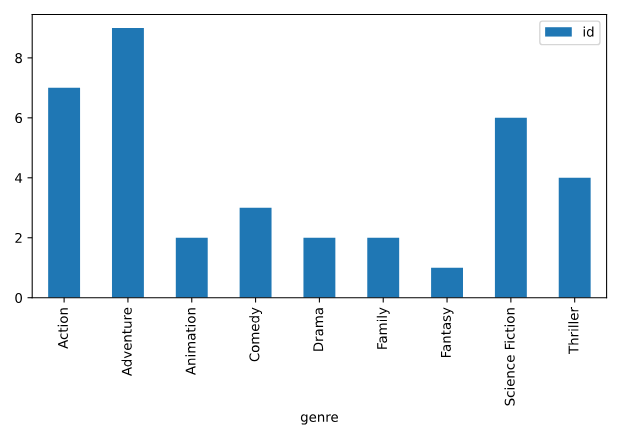



### Exercise
Using outer join to select actors
One cool aspect of using an outer join is that, because it returns all rows from both merged tables and null where they do not match, you can use it to find rows that do not have a match in the other table. To try for yourself, you have been given two tables with a list of actors from two popular movies: Iron Man 1 and Iron Man 2. Most of the actors played in both movies. Use an outer join to find actors who did not act in both movies.

The Iron Man 1 table is called iron_1_actors, and Iron Man 2 table is called iron_2_actors. Both tables have been loaded for you and a few rows printed so you can see the structure.

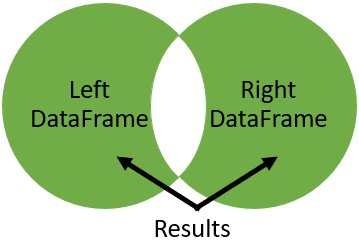

Instructions
100 XP
Save to iron_1_and_2 the merge of iron_1_actors (left) with iron_2_actors tables with an outer join on the id column, and set suffixes to ('_1','_2').
Create an index that returns True if name_1 or name_2 are null, and False otherwise.

```python

# Merge iron_1_actors to iron_2_actors on id with outer join using suffixes
iron_1_and_2 = iron_1_actors.merge(iron_2_actors,
                                     on = 'id',
                                     how = 'outer',
                                     suffixes=('_1', '_2')
)
# Create an index that returns true if name_1 or name_2 are null
m = ((iron_1_and_2['name_1'].isnull()) | 
     (iron_1_and_2['name_2'].isnull()))

# Print the first few rows of iron_1_and_2
print(iron_1_and_2[m].head())


# <script.py> output:
#                        character_1    id        name_1                                       character_2              name_2
#     0  Obadiah Stane / Iron Monger  1229  Jeff Bridges                                               NaN                 NaN
#     1                          NaN  1245           NaN  Natalie Rushman / Natasha Romanoff / Black Widow  Scarlett Johansson
#     2                          NaN  1896           NaN      Lt. Col. James "Rhodey" Rhodes / War Machine         Don Cheadle
#     4                          NaN  2295           NaN                             Ivan Vanko / Whiplash       Mickey Rourke
#     7                          NaN  6807           NaN                                     Justin Hammer        Sam Rockwell

```


# 📚 Merging a Table to Itself in Pandas (Self Join) — Notes

---

## 1. What is "Merging a Table to Itself"?
- Also called a **self join**.
- We combine a table with another copy of itself.
- This is useful when:
  - The table has **hierarchical relationships** (e.g., employee → manager).
  - The table has **sequential relationships** (e.g., movie → sequel).
  - We are working with **graph data** (e.g., networks of friends).

---

## 2. Our Dataset: `sequels`
We have a movie dataset where:
- `id` → unique movie ID.
- `title` → movie name.
- `sequel` → ID of the sequel movie (if it exists).

```python
print(sequels.head())
````

**Output:**

```
      id       title     sequel
0  19995     Avatar        NaN
1    862  Toy Story      863.0
2    863  Toy Story 2  10193.0
3    597    Titanic       NaN
4  24428 The Avengers    NaN
```

💡 **Explanation:**

* Example: `Toy Story` has `id = 862` and `sequel = 863` → `863` is the ID for `Toy Story 2`.

---

## 3. Inner Join: Linking Each Movie to Its Sequel

We merge the `sequels` table with itself:

* `left_on='sequel'` → sequel IDs in the left table.
* `right_on='id'` → match those sequel IDs to IDs in the right table.
* `suffixes=('_org', '_seq')` → label columns for **original** vs **sequel** movies.

```python
original_sequels = sequels.merge(
    sequels,
    left_on='sequel',
    right_on='id',
    suffixes=('_org', '_seq')
)
print(original_sequels.head())
```

**Output:**

```
   id_org    title_org  sequel_org   id_seq     title_seq  sequel_seq
0     862   Toy Story     863.0       863   Toy Story 2   10193.0
1     863   Toy Story 2  10193.0    10193   Toy Story 3       NaN
2     675   Harry Potter  767.0       767   Harry Potter      NaN
3     121   The Lord...   122.0       122   The Lord...       NaN
4     120   The Lord...   121.0       121   The Lord...    122.0
```

**Line-by-line Explanation:**

* `sequels.merge(sequels, ...)` → merge the table with itself.
* `left_on='sequel', right_on='id'` → match sequel IDs from left with IDs from right.
* `suffixes` → helps us know which side the data came from.

**What it means:**

* Each row now has:

  * Original movie (`title_org`)
  * Its sequel movie (`title_seq`)

---

## 4. Showing Only Movie Titles

```python
print(original_sequels[['title_org', 'title_seq']].head())
```

**Output:**

```
       title_org        title_seq
0     Toy Story      Toy Story 2
1   Toy Story 2    Toy Story 3
2  Harry Potter   Harry Potter
3  The Lord...    The Lord...
4  The Lord...    The Lord...
```

💡 **This is cleaner** — just the original → sequel pairing.

---

## 5. Left Join: Keeping All Original Movies

With a **left join**, we keep all movies, even those without sequels.

```python
original_sequels_left = sequels.merge(
    sequels,
    left_on='sequel',
    right_on='id',
    how='left',
    suffixes=('_org', '_seq')
)
print(original_sequels_left.head())
```

**Output:**

```
   id_org    title_org sequel_org id_seq   title_seq  sequel_seq
0  19995      Avatar     NaN      NaN       NaN        NaN
1    862   Toy Story   863.0      863  Toy Story 2  10193.0
2    863 Toy Story 2 10193.0   10193  Toy Story 3     NaN
3    597    Titanic     NaN      NaN       NaN        NaN
4  24428 The Avengers  NaN      NaN       NaN        NaN
```

**Key difference:**

* Movies like **Avatar** and **Titanic** appear now (with `NaN` for missing sequel info).

---

## 6. When to Use This Technique

* **Hierarchical data**: employee → manager.
* **Sequential data**: package delivery steps, movie sequels.
* **Graph data**: social media friendships.

---

## 📝 Summary Table

| Technique       | Method                    | Keeps All Left Rows? | Match Type               |
| --------------- | ------------------------- | -------------------- | ------------------------ |
| Inner self-join | `merge(..., how='inner')` | ❌                    | Only matching sequel IDs |
| Left self-join  | `merge(..., how='left')`  | ✅                    | Keep all originals       |

💡 **Memory trick:** Think of self join like looking in the mirror — you're just matching the table to its own reflection.

---

```

```


### Exercise
Self join
Merging a table to itself can be useful when you want to compare values in a column to other values in the same column. In this exercise, you will practice this by creating a table that for each movie will list the movie director and a member of the crew on one row. You have been given a table called crews, which has columns id, job, and name. First, merge the table to itself using the movie ID. This merge will give you a larger table where for each movie, every job is matched against each other. Then select only those rows with a director in the left table, and avoid having a row where the director's job is listed in both the left and right tables. This filtering will remove job combinations that aren't with the director.

The crews table has been loaded for you.

Instructions 1/3
35 XP
```python
1. To a variable called crews_self_merged, merge the crews table to itself on the id column using an inner join, setting the suffixes to '_dir' and '_crew' for the left and right tables respectively.

# Merge the crews table to itself
crews_self_merged = crews.merge(crews, on= 'id',
                    suffixes=('_dir', '_crew'))

Instructions 2/3
35 XP
2. Create a Boolean index, named boolean_filter, that selects rows from the left table with the job of 'Director' and avoids rows with the job of 'Director' in the right table.

# Merge the crews table to itself
crews_self_merged = crews.merge(crews, on='id', how='inner',
                                suffixes=('_dir','_crew'))

# Create a Boolean index to select the appropriate
boolean_filter = ((crews_self_merged['job_dir'] == 'Director') & 
     (crews_self_merged['job_crew'] != 'Director'))
direct_crews = crews_self_merged[boolean_filter]

Instructions 3/3
30 XP
3. Use the .head() method to print the first few rows of direct_crews.

# Merge the crews table to itself
crews_self_merged = crews.merge(crews, on='id', how='inner',
                                suffixes=('_dir','_crew'))

# Create a boolean index to select the appropriate rows
boolean_filter = ((crews_self_merged['job_dir'] == 'Director') & 
                  (crews_self_merged['job_crew'] != 'Director'))
direct_crews = crews_self_merged[boolean_filter]

# Print the first few rows of direct_crews
print(direct_crews.head())


<script.py> output:
            id   job_dir       name_dir        job_crew          name_crew
    156  19995  Director  James Cameron          Editor  Stephen E. Rivkin
    157  19995  Director  James Cameron  Sound Designer  Christopher Boyes
    158  19995  Director  James Cameron         Casting          Mali Finn
    160  19995  Director  James Cameron          Writer      James Cameron
    161  19995  Director  James Cameron    Set Designer    Richard F. Mays
```



# Joining Data with Pandas – Merging on Indexes

---

## 1. Introduction – Merging on Indexes

* Normally, merges in Pandas are done using **columns** as the keys.
* You can also merge **using indexes**.
* An **index** often contains a unique identifier (e.g., `id`) that can be used in joins.
* The merge syntax is very similar — just specify the **index name** in the `on` argument.

---

## 2. Table with an Index

**Original table with default index:**

|   | id    | title           | popularity | release\_date |
| - | ----- | --------------- | ---------- | ------------- |
| 0 | 257   | Oliver Twist    | 20.415572  | 2005-09-23    |
| 1 | 14290 | Better Luck...  | 3.877036   | 2002-01-12    |
| 2 | 38365 | Grown Ups       | 38.864027  | 2010-06-24    |
| 3 | 9672  | Infamous        | 3.680896   | 2006-11-16    |
| 4 | 12819 | Alpha and Omega | 12.300789  | 2010-09-17    |

**Table with `id` as the index:**

| id    | title           | popularity | release\_date |
| ----- | --------------- | ---------- | ------------- |
| 257   | Oliver Twist    | 20.415572  | 2005-09-23    |
| 14290 | Better Luck...  | 3.877036   | 2002-01-12    |
| 38365 | Grown Ups       | 38.864027  | 2010-06-24    |
| 9672  | Infamous        | 3.680896   | 2006-11-16    |
| 12819 | Alpha and Omega | 12.300789  | 2010-09-17    |

📌 **Why use indexes in merges?**
Indexes can make merges cleaner when the unique identifier is already set as the index — no need to treat it as a column.

---

## 3. Setting an Index

```python
import pandas as pd

movies = pd.read_csv('tmdb_movies.csv', index_col=['id'])
print(movies.head())
```

**Explanation:**

1. `pd.read_csv('tmdb_movies.csv', index_col=['id'])`

   * Reads the CSV file into a DataFrame.
   * `index_col=['id']` tells Pandas to set the `id` column as the DataFrame index.
2. `movies.head()`

   * Displays the first 5 rows.

**Output:**

```
                         title   popularity release_date
id
257             Oliver Twist   20.415572   2005-09-23
14290     Better Luck ...     3.877036    2002-01-12
38365           Grown Ups    38.864027   2010-06-24
9672              Infamous     3.680896   2006-11-16
12819     Alpha and Omega    12.300789   2010-09-17
```

📌 **Key Point:**
Now `id` is not a column but the **row index**, which we can use in merges.

---

## 4. Merge Index Datasets

We have two datasets:

* `movies` (with `id` as index)
* `taglines` (with `id` as column or index)

**Merging using index:**

```python
movies_taglines = movies.merge(taglines, on='id', how='left')
print(movies_taglines.head())
```

**Explanation:**

1. `movies.merge(...)` merges `movies` and `taglines`.
2. `on='id'` specifies the key — here `id` is an index in `movies`.
3. `how='left'` keeps **all rows from `movies`** and matches `taglines` where possible.

**Output:**

```
                         title   popularity release_date          tagline
id
257             Oliver Twist   20.415572   2005-09-23              NaN
14290     Better Luck ...     3.877036    2002-01-12   Never underestimate...
38365           Grown Ups    38.864027   2010-06-24   Boys will be boys...
9672              Infamous     3.680896   2006-11-16   There's more to the...
12819     Alpha and Omega    12.300789   2010-09-17   A Pawsome 3D Adventure
```

📌 **Key Point:**
If a tagline is missing for a movie, it shows as `NaN`.

---

## 5. MultiIndex Datasets

**Example tables:**

`samuels.csv` (index = `movie_id`, `cast_id`):

| movie\_id | cast\_id | name              |
| --------- | -------- | ----------------- |
| 3         | 184      | Samuel L. Jackson |
| 13        | 319      | Samuel L. Jackson |

`casts.csv` (index = `movie_id`, `cast_id`):

| movie\_id | cast\_id | character |
| --------- | -------- | --------- |
| 5         | 22       | Jezebel   |
| 23        | 24       | Diana     |

**Loading with MultiIndex:**

```python
samuel = pd.read_csv('samuel.csv', index_col=['movie_id','cast_id'])
casts = pd.read_csv('casts.csv', index_col=['movie_id','cast_id'])
print(samuel.head())
print(casts.head())
```

**Explanation:**

* Both tables have **two index levels**: `movie_id` and `cast_id`.

---

## 6. MultiIndex Merge

```python
samuel_casts = samuel.merge(casts, on=['movie_id', 'cast_id'])
print(samuel_casts.head())
print(samuel_casts.shape)
```

**Explanation:**

1. `on=['movie_id', 'cast_id']` merges using both index levels.
2. Since it's an **inner join** (default), only rows where both IDs match are returned.

**Output:**

```
                               name              character
movie_id cast_id
3        184        Samuel L. Jackson    Ordell Robbie
13       319        Samuel L. Jackson    Big Don
2        326        Samuel L. Jackson    Neville Flynn
138      329        Samuel L. Jackson    Arnold
21       393        Samuel L. Jackson    Rufus
(67, 2)
```

📌 **Observation:** Samuel L. Jackson has **67** matching movie-character pairs.

---

## 7. Index Merge with `left_on` and `right_on`

When index names differ between tables, we use:

* `left_on` / `right_on` to specify the matching fields.
* `left_index=True` / `right_index=True` to indicate that those keys are **indexes**.

**Example:**

* `movies` (index = `id`)
* `movie_to_genres` (index = `movie_id`)

```python
movies_genres = movies.merge(
    movie_to_genres,
    left_on='id', left_index=True,
    right_on='movie_id', right_index=True
)
print(movies_genres.head())
```

**Explanation:**

1. `left_on='id'` → `movies`' index name.
2. `right_on='movie_id'` → `movie_to_genres`' index name.
3. Both `left_index` and `right_index` are set to `True` to indicate that the merge is using indexes.

**Output:**

```
     id         title       popularity release_date        genre
5     5     Four Rooms    22.876230   1995-12-09    Crime
5     5     Four Rooms    22.876230   1995-12-09    Comedy
11   11     Star Wars    126.393695  1977-05-25    Science Fiction
11   11     Star Wars    126.393695  1977-05-25    Action
11   11     Star Wars    126.393695  1977-05-25    Adventure
```

📌 **Key Point:**
One movie can map to multiple genres, hence repeated rows with different genre values.

---

## 8. Summary

* **Merging on Index**: Similar syntax to merging on columns, just use index names in `on`.
* **MultiIndex**: Pass a list of index level names to merge on multiple levels.
* **Different index names**: Use `left_on` / `right_on` with `left_index=True` / `right_index=True`.
* **Outputs**: Always inspect results to ensure correct matches and understand duplicates.




### Exercise
Index merge for movie ratings
To practice merging on indexes, you will merge movies and a table called ratings that holds info about movie ratings. Ensure that your merge returns all rows from the movies table, and only matching rows from the ratings table.

The movies and ratings tables have been loaded for you.

Instructions
100 XP
Merge the movies and ratings tables on the id column, keeping all rows from the movies table, and save the result as movies_ratings.
```python
# Merge to the movies table the ratings table on the index
movies_ratings = movies.merge(ratings, on= 'id', how='left')

# Print the first few rows of movies_ratings
print(movies_ratings.head())

<script.py> output:
                          title  popularity release_date  vote_average  vote_count
    id                                                                            
    257            Oliver Twist      20.416   2005-09-23           6.7       274.0
    14290  Better Luck Tomorrow       3.877   2002-01-12           6.5        27.0
    38365             Grown Ups      38.864   2010-06-24           6.0      1705.0
    9672               Infamous       3.681   2006-11-16           6.4        60.0
    12819       Alpha and Omega      12.301   2010-09-17           5.3       124.0
In [3]:

```

### Exercise
Do sequels earn more?
It is time to put together many of the aspects that you have learned in this chapter. In this exercise, you'll find out which movie sequels earned the most compared to the original movie. To answer this question, you will merge a modified version of the sequels and financials tables where their index is the movie ID. You will need to choose a merge type that will return all of the rows from the sequels table and not all the rows of financials table need to be included in the result. From there, you will join the resulting table to itself so that you can compare the revenue values of the original movie to the sequel. Next, you will calculate the difference between the two revenues and sort the resulting dataset.

The sequels and financials tables have been provided.
```python
Instructions 1/4
25 XP
1 With the sequels table on the left, merge to it the financials table on index named id, ensuring that all the rows from the sequels are returned and some rows from the other table may not be returned, Save the results to sequels_fin.

# Merge sequels and financials on index id
sequels_fin = sequels.merge(financials, on='id', how='left')

Instructions 2/4
25 XP
2 Merge the sequels_fin table to itself with an inner join, where the left and right tables merge on sequel and id respectively with suffixes equal to ('_org','_seq'), saving to orig_seq.

# Merge sequels and financials on index id
sequels_fin = sequels.merge(financials, on='id', how='left')

# Self merge with suffixes as inner join with left on sequel and right on id
orig_seq = sequels_fin.merge(sequels_fin, how='inner', left_on='sequel', 
                             right_on='id', right_index=True,
                             suffixes=('_org','_seq'))

# Add calculation to subtract revenue_org from revenue_seq 
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

Instructions 3/4
25 XP
3 Select the title_org, title_seq, and diff columns of orig_seq and save this as titles_diff.

# Merge sequels and financials on index id
sequels_fin = sequels.merge(financials, on='id', how='left')

# Self merge with suffixes as inner join with left on sequel and right on id
orig_seq = sequels_fin.merge(sequels_fin, how='inner', left_on='sequel', 
                             right_on='id', right_index=True,
                             suffixes=('_org','_seq'))

# Add calculation to subtract revenue_org from revenue_seq 
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

# Select the title_org, title_seq, and diff 
titles_diff = orig_seq[['title_org','title_seq', 'diff']]


Instructions 4/4
25 XP
4. Sort by titles_diff by diff in descending order and print the first few rows.

# Merge sequels and financials on index id
sequels_fin = sequels.merge(financials, on='id', how='left')

# Self merge with suffixes as inner join with left on sequel and right on id
orig_seq = sequels_fin.merge(sequels_fin, how='inner', left_on='sequel', 
                             right_on='id', right_index=True,
                             suffixes=('_org','_seq'))

# Add calculation to subtract revenue_org from revenue_seq 
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

# Select the title_org, title_seq, and diff 
titles_diff = orig_seq[['title_org','title_seq','diff']]

# Print the first rows of the sorted titles_diff
print(titles_diff.sort_values('diff', ascending = False).head())

<script.py> output:
                   title_org        title_seq       diff
    id                                                  
    331    Jurassic Park III   Jurassic World  1.145e+09
    272        Batman Begins  The Dark Knight  6.303e+08
    10138         Iron Man 2       Iron Man 3  5.915e+08
    863          Toy Story 2      Toy Story 3  5.696e+08
    10764  Quantum of Solace          Skyfall  5.225e+08
```

End...